In [2]:
import os
import warnings
import numpy as np
np.corrcoef(*np.random.randn(2,3))
import pickle
from sys import exc_info, exit

from pandas import DataFrame
from sys import path as syspath
syspath.append(os.path.expanduser("~/srdjan_functs/"))

In [30]:
from caiman import movie as cmovie

In [15]:
from islets.Regions1 import load_regions

In [53]:
from islets.utils import saveRois

In [3]:
import bioformats as bf

In [4]:
bf.javabridge.start_vm(
    class_path=bf.JARS,
    max_heap_size="20G",
                      )

In [25]:
from islets.Recording1 import Recording

In [58]:
pickles = []
for cr,ds,fs in os.walk("/data/Sandra/2020/2020_11_27/"):
#     print ("")
    for f in fs:
        if not f.endswith("pkl"): continue
        path = os.path.join(cr,f)
        if "all" in path: continue
        print (path, os.path.getsize(path)/1e6)
        pickles += [path]

/data/Sandra/2020/2020_11_27/Experiment78h.lif_analysis/Series002-10/8_rois.pkl 38.327739
/data/Sandra/2020/2020_11_27/Experiment78b.lif_analysis/Series003-9/7_rois.pkl 53.091504
/data/Sandra/2020/2020_11_27/Experiment78c.lif_analysis/Series003-17/7_rois.pkl 98.513608
/data/Sandra/2020/2020_11_27/Experiment78e.lif_analysis/Series001-8/7_rois.pkl 45.724775
/data/Sandra/2020/2020_11_27/Experiment78j.lif_analysis/Series001-4/5_rois.pkl 48.871989
/data/Sandra/2020/2020_11_27/Experiment78a.lif_analysis/Series002-7/7_rois.pkl 468.59865
/data/Sandra/2020/2020_11_27/Experiment78d.lif_analysis/Series001-7/7_rois.pkl 53.185765
/data/Sandra/2020/2020_11_27/Experiment78i.lif_analysis/Series001-9/9_rois.pkl 19.036988
/data/Sandra/2020/2020_11_27/Experiment78g.lif_analysis/Series004-10/7_rois.pkl 29.112752


In [61]:
pickles = sorted(pickles)[1:]

In [63]:
pickles

['/data/Sandra/2020/2020_11_27/Experiment78b.lif_analysis/Series003-9/7_rois.pkl',
 '/data/Sandra/2020/2020_11_27/Experiment78c.lif_analysis/Series003-17/7_rois.pkl',
 '/data/Sandra/2020/2020_11_27/Experiment78d.lif_analysis/Series001-7/7_rois.pkl',
 '/data/Sandra/2020/2020_11_27/Experiment78e.lif_analysis/Series001-8/7_rois.pkl',
 '/data/Sandra/2020/2020_11_27/Experiment78g.lif_analysis/Series004-10/7_rois.pkl',
 '/data/Sandra/2020/2020_11_27/Experiment78h.lif_analysis/Series002-10/8_rois.pkl',
 '/data/Sandra/2020/2020_11_27/Experiment78i.lif_analysis/Series001-9/9_rois.pkl',
 '/data/Sandra/2020/2020_11_27/Experiment78j.lif_analysis/Series001-4/5_rois.pkl']

In [ ]:
for path in pickles:
    with open(path,"rb") as f:
        regions = pickle.load(f)

    recFile = path.split("_analysis")[0]
    ser = path.split("_analysis")[1].split("/")[1]
    rec = Recording(recFile)
    rec.import_series(ser)
    movie = cmovie(rec.Series[ser]["data"], fr=rec.Series[ser]["metadata"]["Frequency"])
    regions.calcTraces(movie, FrameRange=(0, len(movie)))
    saveDir = os.path.split(path)[0]
    regions.update()
    regions.infer_gain(plot=True)
    saveRois(regions, saveDir, filename= ".".join(map(str,regions.filterSize)), add_date=False, formats=["vienna"])
    del rec

/home/jupyter-srdjan/srdjan_functs/islets/Regions1.py:769: RuntimeWarning: invalid value encountered in sqrt
  var = var*self.gain
/home/jupyter-srdjan/srdjan_functs/islets/Regions1.py:769: RuntimeWarning: invalid value encountered in sqrt
  var = var*self.gain
/home/jupyter-srdjan/srdjan_functs/islets/Regions1.py:590: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if plot:


/home/jupyter-srdjan/srdjan_functs/islets/Regions1.py:773: RuntimeWarning: invalid value encountered in sqrt
  slower = [absSlow[i]/C["size"].iloc[i]/Nrebin for i in range(len(C))]


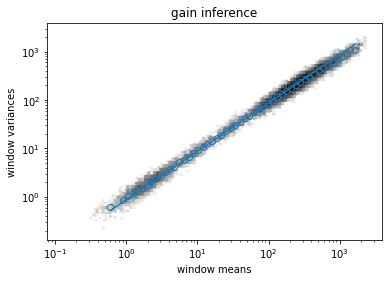

In [65]:
regions.infer_gain(True)

In [67]:
regions.calc_interest()

/home/jupyter-srdjan/srdjan_functs/islets/Regions1.py:773: RuntimeWarning:

invalid value encountered in sqrt

/home/jupyter-srdjan/srdjan_functs/islets/Regions1.py:749: RuntimeWarning:

invalid value encountered in sqrt



In [68]:
regions.examine()

In [80]:
regions = load_regions( '/data/Sandra/2020/2020_11_27/Experiment78e.lif_analysis/Series001-8/7_rois.pkl')

/home/jupyter-srdjan/srdjan_functs/islets/Regions1.py:773: RuntimeWarning:

invalid value encountered in sqrt



In [81]:
regions.df.columns

Index(['peak', 'pixels', 'peakValue', 'interest', 'trace', 'size', 'edges',
       'boundary', 'neighbors', 'Nneighbors', 'trend', 'detrended'],
      dtype='object')

/home/jupyter-srdjan/srdjan_functs/islets/Regions1.py:773: RuntimeWarning:

invalid value encountered in sqrt



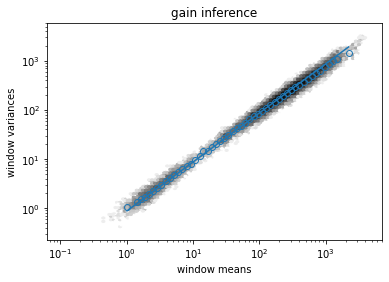

In [71]:
regions.infer_gain(True)

In [73]:
regions.Freq, regions.metadata

(19.8,
 Name                                                       Series001-8
 SizeT                                                            63641
 SizeX                                                              512
 SizeY                                                              512
 SizeZ                                                                1
 pxSize                                                            0.91
 pxUnit                                                              µm
 bit depth                                                        uint8
 Frequency                                                         19.8
 Start time                                         2020-11-27 19:58:58
 End time                                           2020-11-27 20:05:42
 Duration                                     0 days 00:06:44.917999268
 line scan                                                         none
 time_range                                              

In [78]:
regions.df.trace.iloc[0].shape

(63682,)

In [79]:
len(regions.time)

63682

In [76]:
len(regions.time),regions.time[-1]

19.80031092476563

In [82]:
regions.examine()

In [83]:
s,f,z = regions.fast_filter_traces(100, Npoints=np.inf, write=False)

/home/jupyter-srdjan/srdjan_functs/islets/Regions1.py:749: RuntimeWarning:

invalid value encountered in sqrt



In [90]:
plt.plot(regions.time, regions.sosFilter.run(regions.df.loc[306,"trace"]))

array([0.75198553, 0.75204216, 0.7520988 , ..., 1.38455747, 1.38455747,
       1.38455747])

In [89]:
np.isnan(s).all()

False

In [86]:
s[regions.df.index==307]

array([[nan, nan, nan, ..., nan, nan, nan]])

In [ ]:
for f in os.listdir("/data/Sandra/2020/2020_03_06/"):
    if f.endswith(".nd2"):
        rec = Recording(f"/data/Sandra/2020/2020_03_06/{f}")
        rec.save_metadata()

Recording /data/Sandra/2020/2020_03_06/Series.nd2 not yet preprocessed. Preprocessing takes a few seconds and will speed up the usage later... Finished.
Recording /data/Sandra/2020/2020_03_06/Series002.nd2 not yet preprocessed. Preprocessing takes a few seconds and will speed up the usage later... Finished.
Recording /data/Sandra/2020/2020_03_06/Series014.nd2 not yet preprocessed. Preprocessing takes a few seconds and will speed up the usage later... Finished.
Recording /data/Sandra/2020/2020_03_06/Series017.nd2 not yet preprocessed. Preprocessing takes a few seconds and will speed up the usage later... Finished.
Recording /data/Sandra/2020/2020_03_06/Series005.nd2 not yet preprocessed. Preprocessing takes a few seconds and will speed up the usage later... Finished.
Recording /data/Sandra/2020/2020_03_06/Series019.nd2 not yet preprocessed. Preprocessing takes a few seconds and will speed up the usage later... Finished.
Recording /data/Sandra/2020/2020_03_06/Series004.nd2 not yet prepro

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
%run process_single_5.py --verbose --recording="/data/Sandra/2020/2020_11_23/Experiment77a.lif" --series="Series003-4" --spatial-filter="9" --debug

           recording /data/Sandra/2020/2020_11_23/Experiment77a.lif
              series Series003-4
            restrict 
             use_tif None
         leave_movie False
             verbose True
       leave_pickles False
          only_movie False
      spatial_filter 9
           line_scan none
               debug True
importing modules...
importing series...
creating directory /data/Sandra/2020/2020_11_23/Experiment77a.lif_analysis/Series003-4


AssertionError: 

In [6]:
movie = cmovie(
    rec.Series[serToImport]['data'],
    fr=metadata.Frequency
)


In [4]:
rec.metadata.iloc[:4]

,Name,SizeT,SizeX,SizeY,SizeZ,pxSize,pxUnit,bit depth,Frequency,Start time,End time,Duration,line scan
0,Image002,1,1024,1024,1,0.455,µm,uint8,NaN,2020-11-23 13:51:05,NaT,NaT,none
1,Series003,8000,512,512,1,0.910,µm,uint8,19.8,2020-11-23 13:57:06,2020-11-23 14:03:50,0 days 00:06:44.417999268,none
2,Series004,8000,512,512,1,0.910,µm,uint8,19.8,2020-11-23 14:03:51,2020-11-23 14:10:35,0 days 00:06:44.458000183,none
3,Series005,8000,512,512,1,0.910,µm,uint8,19.8,2020-11-23 14:10:36,2020-11-23 14:17:20,0 days 00:06:44.490999222,none


In [7]:
movie.dtype, movie.fr, movie.shape, movie.shape[0]/movie.fr

(dtype('uint8'), 19.8, (15959, 512, 512), 806.0101010101009)

In [9]:
nrebin = int(np.round(metadata.Frequency/2))
if nrebin<=1:
    movie = cmovie(
        rec.Series[serToImport]['data'],
        fr=metadata.Frequency
    )
else:
    movie = cmovie(
        rebin(rec.Series[serToImport]['data'], nrebin),
        fr=metadata.Frequency/nrebin
    )

In [10]:
movie.dtype, movie.fr, movie.shape, movie.shape[0]/movie.fr

(dtype('float32'), 1.98, (1595, 512, 512), 805.5555555555555)

In [11]:
movie = movie[:,:50,:50]

In [12]:
#### movie saving (or not)
if len(rec.metadata)==1:
    movieFilename = os.path.join(saveDir, ".".join(rec.Experiment.split(".")[:-1]+["mp4"]))
else:
    movieFilename = os.path.join(saveDir, rec.Experiment+"_"+ser+".mp4")


if metadata.pxSize<.8:
    if args.verbose: print ("Resizing the movie resolution by 2...")
    movie = movie.resize(1/2,1/2,1)
    metadata.pxSize *= 2
    metadata.SizeX /= 2
    metadata.SizeY /= 2

writeMovie = True
if os.path.isfile(movieFilename):
    if args.verbose: print("Movie already exists, ", end="")
    if args.leave_movie:
        writeMovie = False
        if args.verbose: print("and I leave it be.")
    else:
        if args.verbose: print("and I'll rewrite it.")

if writeMovie:
    if args.verbose: print("Writing the movie...")
    if not args.debug: saveMovie(movie,movieFilename)

if args.only_movie:
    if 'rec' in globals():
        del rec
    exit()


#### protocol filename
protocolFilename = movieFilename.replace(".mp4", "_protocol.txt")
if not os.path.isfile(protocolFilename):
    if args.verbose: print("placed dummy protocol file at", protocolFilename)
    if not args.debug:
        DataFrame([[None]*4],columns=["compound","concentration","begin","end"]).to_csv(protocolFilename,index=False)

if args.spatial_filter is None:
    filtSizes = get_filterSizes(metadata.pxSize)
else:
    filtSizes = args.spatial_filter.split(",")
    filtSizes = [eval(el.replace("+",",")) if "+" in el else (int(el),) for el in filtSizes]



Writing the movie...
placed dummy protocol file at /data/Sandra/2020/2020_11_23/Experiment77a.lif_analysis/Series003-4/Experiment77a.lif_Series003-4_protocol.txt


In [13]:
filtSizes

[(9,)]

In [14]:
nrebin

10

In [15]:
for spFilt in filtSizes:
    if args.verbose: print ("\t"*2,"#"*5,spFilt)

    pickleFile = os.path.join(saveDir, ".".join(map(str,spFilt))+"_rois.pkl")
    if os.path.isfile(pickleFile) and args.leave_pickles:
        if args.verbose: print ("already exists, skipping.")
        continue
    else:
        if args.verbose: print ("processing with filter size of ", spFilt)

    regions = Regions(movie,gSig_filt=spFilt,diag=True, 
                      # use_restricted=args.mostly_blank
                     )
    regions.time += metadata.time_range[0]
    if args.verbose:
        print (f"initiallized with {len(regions.df)} rois.")

#     regions.purge_lones((min(spFilt)*.4)**2, verbose=args.verbose)
    regions.merge_closest(verbose=args.verbose)
    regions.sortInOrder()
    regions.calcTraces()
    regions.infer_gain()
    regions.calc_interest()
    regions.metadata = metadata

		 ##### (9,)
processing with filter size of  (9,)
initiallized with 54 rois.
5 subsumed into existing ROIs.
2 subsumed into existing ROIs.
2 subsumed into existing ROIs.


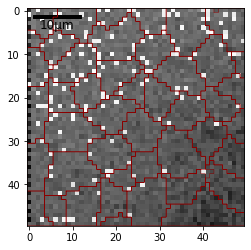

In [16]:
regions.plotEdges()

In [18]:
regions.df.trace[0].shape, regions.time.shape, movie.shape

((1595,), (1595,), (1595, 50, 50))

In [21]:
nrebin

10

In [26]:
m = cmovie(
            rec.Series[serToImport]['data'],
            fr=metadata.Frequency
              )

In [27]:
m.shape

(15959, 512, 512)

In [29]:
if nrebin>1:
    print ("hi")
    regions.calcTraces(m, FrameRange=(0,len(m)))

hi
(45, 15959)


In [25]:
regions.df.trace[0].shape, regions.time.shape, movie.shape

((1595,), (1595,), (1595, 50, 50))

In [9]:
rmovie = movie.resize(1,1,.1)

In [24]:
rbmovie = rebin(movie, 10)
rbmovie = cmovie(rbmovie, fr=movie.fr/10)

In [11]:
rmovie.dtype, rmovie.fr

(dtype('uint8'), 1.9800000000000002)

In [12]:
time = np.arange(len(movie))/movie.fr

In [15]:
import matplotlib.pyplot as plt

In [17]:
%matplotlib notebook

<IPython.core.display.Javascript object>


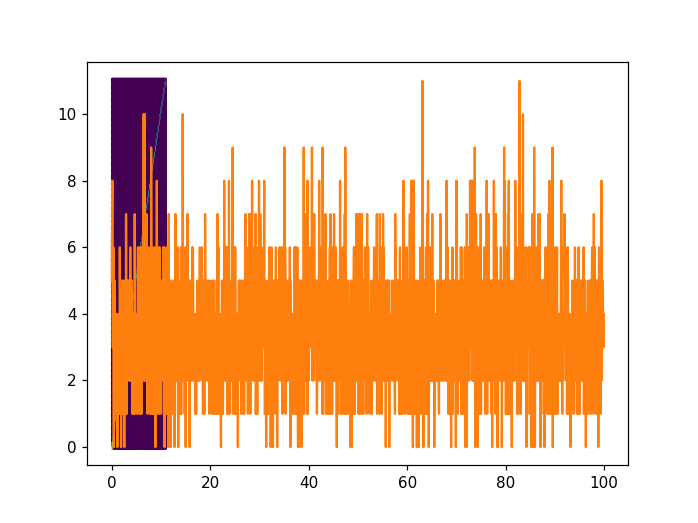

In [19]:
i,j = 100,100
plt.plot(rebin(time, 10),rmovie[:,i,j])
plt.plot(time,movie[:,i,j])

<IPython.core.display.Javascript object>


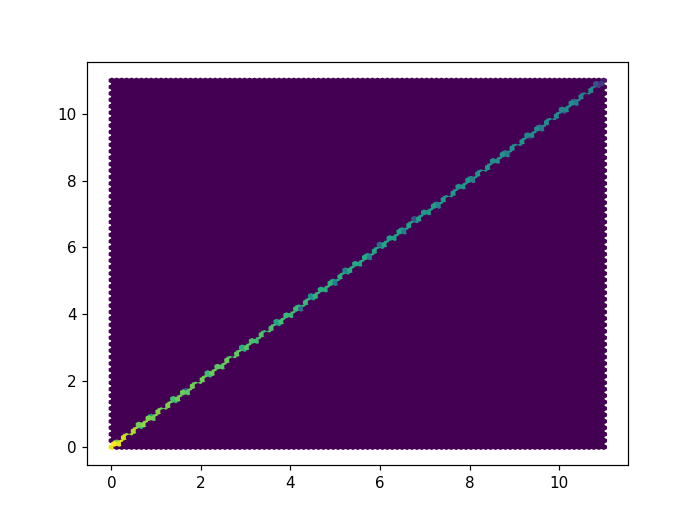

In [25]:
plt.figure()
plt.hexbin(movie.mean(0).flat, rbmovie.mean(0).flat, bins="log")

<IPython.core.display.Javascript object>


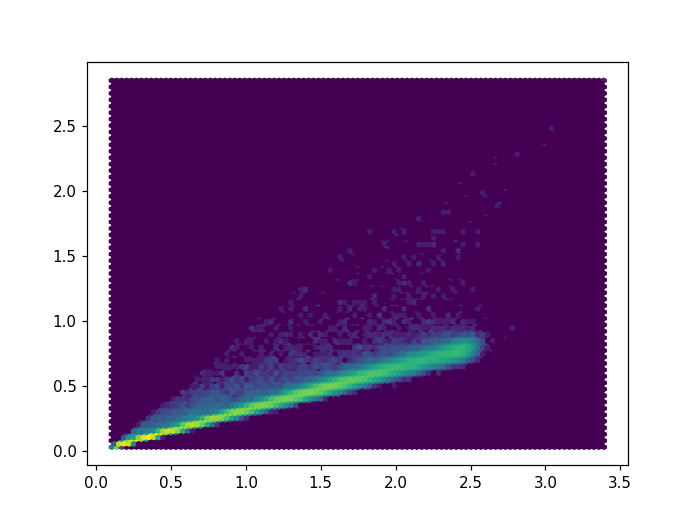

In [26]:
plt.figure()
plt.hexbin(movie.std(0).flat, rbmovie.std(0).flat, bins="log")

In [27]:
regrestr = Regions(rbmovie.resize(.5,.5,1), gSig_filt=(8), use_restricted=True)

In [28]:
regnorm = Regions(rbmovie.resize(.5,.5,1), gSig_filt=(8), use_restricted=False)

<IPython.core.display.Javascript object>


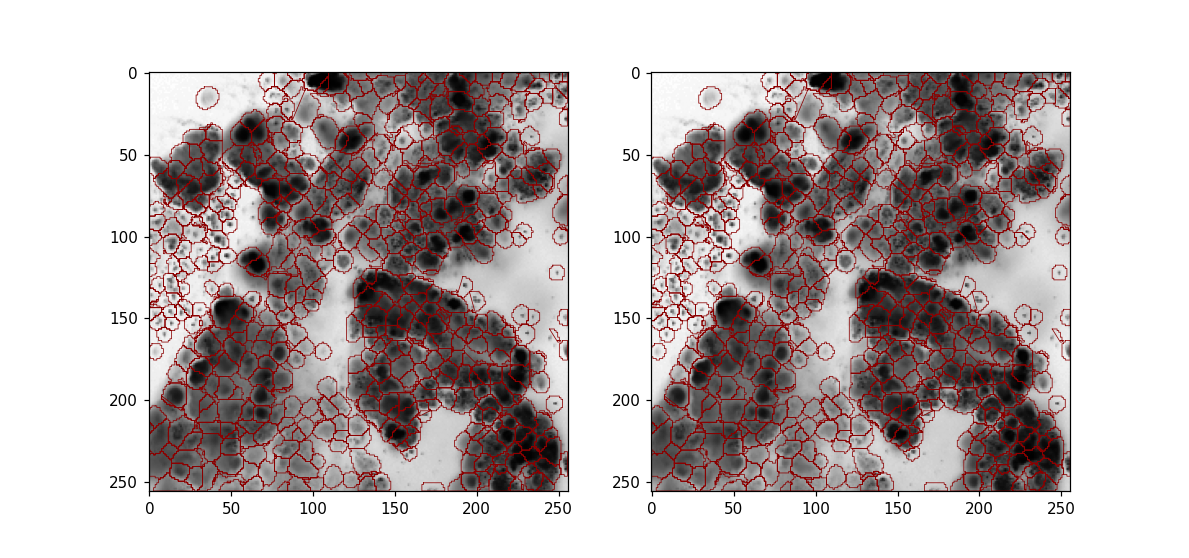

In [29]:
fig, axs = plt.subplots(1,2,figsize=(10,4.7))
for ax, r in zip(axs, [regnorm, regrestr]):
    r.plotEdges(ax=ax)

In [3]:
[f for f in os.listdir("/data/.tmp/") if os.path.isdir(f"/data/.tmp/{f}")]

['.ipynb_checkpoints', '9421587347']

In [ ]:
1848

In [ ]:
2896

In [3]:
# regions.detrend_traces

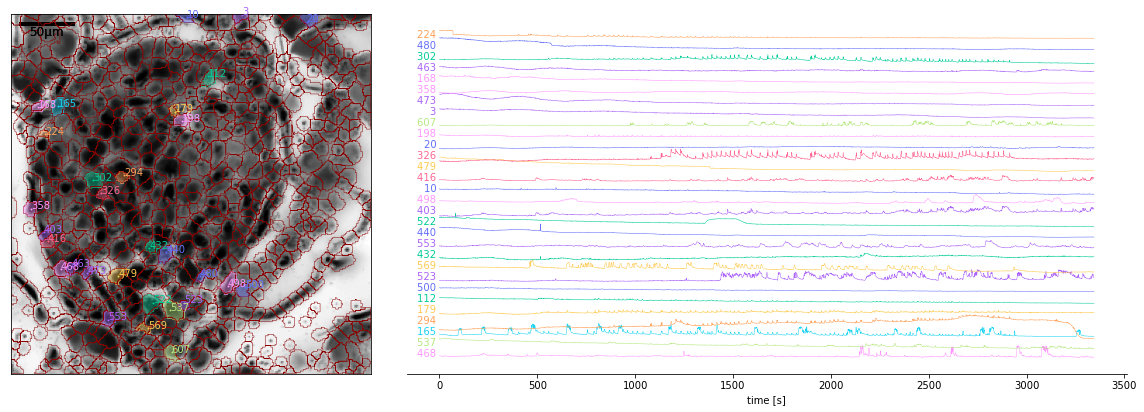

In [4]:
# regions.plotTraces(regions.df.sort_values("interest", ascending=False).index[:30])

In [5]:
from islets.Regions1 import load_regions

In [6]:
old_regions = load_regions("/data/Sandra/2019/2019_07_01/Experiment22.lif_analysis/Series025/6_rois.pkl")

/home/jupyter-srdjan/srdjan_functs/islets/Regions1.py:796: RuntimeWarning: invalid value encountered in true_divide
  zScore = absFast/std
/home/jupyter-srdjan/srdjan_functs/islets/Regions1.py:610: RuntimeWarning: divide by zero encountered in log
  d = np.digitize(np.log(slow_est), logbs)


In [7]:
old_regions.calc_interest()

In [12]:
# old_regions.df["color"] = ["blue"]*len(old_regions.df)
# del old_regions.df["color"]

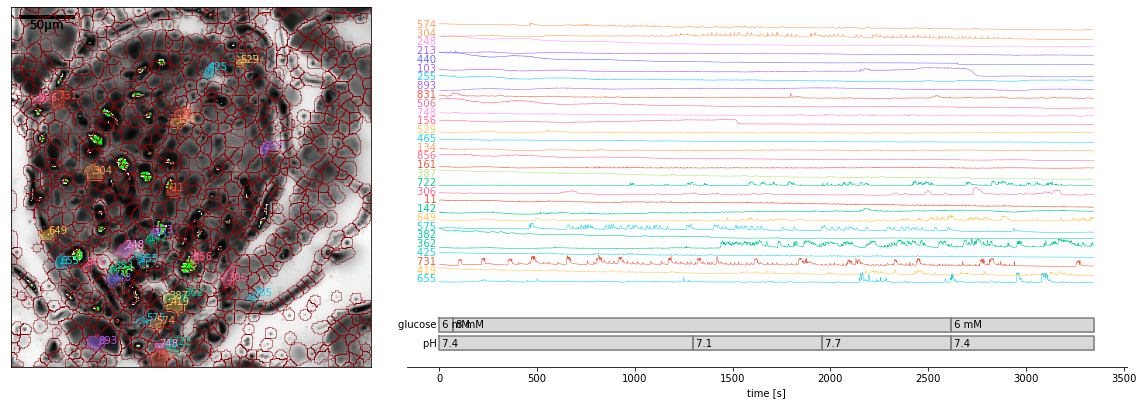

In [13]:
old_regions.plotTraces(old_regions.df.sort_values("interest", ascending=False).index[:30])

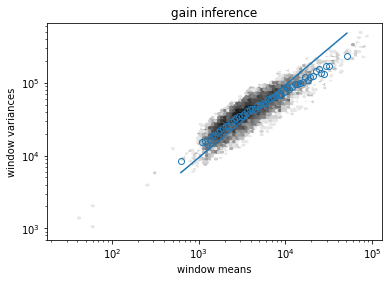

<Figure size 7560x432 with 0 Axes>

In [15]:
old_regions = load_regions("/data/Nastja/2020_11_18/Experiment3a.nd2_analysis/Experiment3a/6_rois.pkl", plot=True, verbose=True)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## importing stuff
import os
import pickle
from sys import path as syspath
syspath.append(os.path.expanduser("~/srdjan_functs/"))
import numpy as np
np.corrcoef(*np.random.randn(2,3))
import matplotlib.pyplot as plt
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    from caiman import movie as cmovie
    from caiman import load  as cload

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

import PicklePicker as pp
from IPython.display import display
import pandas as pd
from islets.Recording1 import Recording, saveMovie
from islets.Regions1 import Regions
from islets.numeric import power_spectrum, rebin
from islets.utils import show_movie, saveRois
from matplotlib.colors import LogNorm
from islets.Recording import import_data
from islets.Regions1 import load_regions
from islets.utils import rgb_to_hex

import bioformats as bf


In [3]:

import os
import pickle
from sys import path as syspath
syspath.append(os.path.expanduser("~/srdjan_functs/"))
from islets.Recording1 import Recording, saveMovie

In [9]:
rec = Recording("/data/Sandra/2019/2019_02_12/Experiment2.lif")

In [3]:
import bioformats as bf

In [4]:
bf.javabridge.start_vm(class_path=bf.JARS)

In [10]:
rec.import_series("Series006", restrict=(0,10))

In [6]:
rec.Series["Series006"]["data"]

memmap([[[0, 0, 4, ..., 6, 2, 0],
         [6, 2, 1, ..., 2, 6, 4],
         [3, 0, 1, ..., 0, 1, 6],
         ...,
         [1, 6, 1, ..., 0, 4, 2],
         [0, 2, 4, ..., 2, 2, 1],
         [2, 1, 0, ..., 3, 2, 0]],

        [[2, 2, 4, ..., 4, 0, 0],
         [1, 1, 2, ..., 0, 0, 2],
         [0, 4, 0, ..., 2, 0, 0],
         ...,
         [0, 2, 0, ..., 2, 2, 5],
         [1, 0, 4, ..., 0, 2, 1],
         [2, 0, 6, ..., 0, 0, 0]],

        [[0, 2, 0, ..., 4, 1, 2],
         [0, 0, 0, ..., 2, 2, 1],
         [1, 0, 6, ..., 2, 1, 0],
         ...,
         [4, 6, 2, ..., 0, 0, 0],
         [0, 4, 2, ..., 0, 2, 0],
         [0, 4, 0, ..., 0, 2, 4]],

        ...,

        [[4, 0, 0, ..., 0, 0, 1],
         [0, 0, 0, ..., 0, 1, 1],
         [1, 0, 0, ..., 2, 4, 4],
         ...,
         [2, 6, 4, ..., 0, 2, 1],
         [2, 3, 0, ..., 2, 0, 1],
         [1, 4, 1, ..., 0, 2, 0]],

        [[0, 0, 2, ..., 1, 4, 4],
         [1, 0, 0, ..., 1, 0, 0],
         [3, 2, 4, ..., 4, 0, 1],
    

In [11]:
del rec

In [6]:
np.memmap?

In [2]:
# %run process_single_4.py -rec="/data/Nastja/2020_11_18/Experiment3a.nd2" -ser="Series025" --verbose --debug --restrict="10_500" --spatial-filter="5" --leave-movie

In [3]:
# %run process_single_4.py -rec="/data/Nastja/2020_11_18/Experiment3a.nd2" --only-movie

In [5]:
import_data("/data/Sandra/2020")

Recording /data/Sandra/2020/2020_11_19/Experiment76.lif not yet preprocessed. Preprocessing takes a few seconds and will speed up the usage later... 


/home/jupyter-srdjan/srdjan_functs/islets/Recording.py:135: UserWarning: Could not parse metadata. (<class 'AttributeError'>, AttributeError("'NoneType' object has no attribute 'find_class'"), <traceback object at 0x7f081376c280>)
  warn(f"Could not parse metadata. {exc_info()}")


AttributeError: 'Recording' object has no attribute 'metadata'

In [16]:
regions = load_regions(regions.pathToPickle, mergeDist=0)

In [4]:
# regions.plotTraces(regions.df.index, col="trace")

In [7]:
del regions.metadata

300 subsumed into existing ROIs.
106 subsumed into existing ROIs.


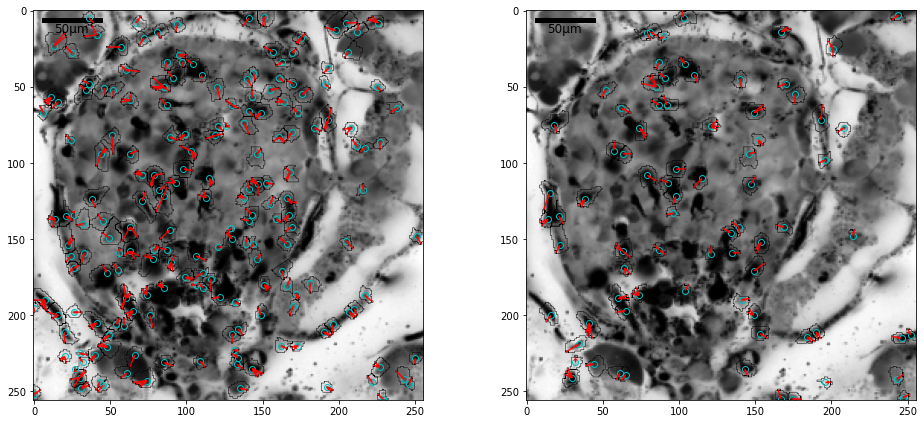

In [17]:
regions.merge_closest(plot=True, Niter=2, verbose=True)

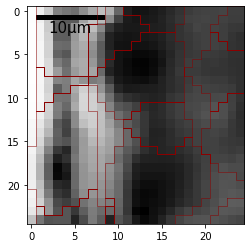

In [3]:
regions.plotEdges()

In [2]:
# saveMovie(movie,"embed")

In [4]:
from IPython.display import Video
Video(movieFilename, embed=True)

In [9]:
HTML(f"""
    <video alt="test" width="320" height="240" controls>
        <source src="{movieFilename}" type="video/mp4">
    </video>
""")


In [2]:
rec = Recording()

In [3]:
serToImport = "Series025"

In [4]:
restrict = (10,-3000)

In [5]:
bf.javabridge.start_vm(class_path=bf.JARS)
rec.import_series(serToImport, restrict=restrict)
bf.javabridge.kill_vm()

In [13]:
movie = cmovie(
    rec.Series[serToImport]["data"],
    fr = rec.Series[serToImport]["metadata"]["Frequency"],
              )

In [14]:
metadata = rec.Series[serToImport]["metadata"]

In [15]:
# show_movie(movie[:,::2,::2].astype("float32")+1, autoadjust=False, log=True)

In [16]:
movie = movie.resize(.5,.5,1)

In [17]:
show_movie(movie[:3])

In [12]:
metadata.pxSizeze

AttributeError: 'Series' object has no attribute 'pxSizeze'

In [18]:
#     if len(pathToCorrected):
#         movie = cload(
#             pathToCorrected,
#             fr=metadata.Frequency,
#             outtype=metadata['bit depth']
#         )
#         FrameRange = metadata.frame_range
#         movie = movie[FrameRange[0]:FrameRange[1]]
#     else:
#         movie = cmovie(
#             rec.Series[serToImport]['data'],
#             fr=metadata.Frequency
#         )

In [27]:
# ser = serToImport

In [28]:
saveDir = os.path.join(rec.folder, rec.Experiment+"_analysis", ser)

In [29]:
if len(rec.metadata)==1:
    movieFilename = os.path.join(saveDir, os.path.splitext(rec.Experiment)[0]+".mp4")
else:
    movieFilename = os.path.join(saveDir, rec.Experiment+"_"+ser+".mp4")

In [42]:
movie.fr = None

In [31]:
# metadata.pxSize

In [ ]:
def process_movie(movie, metadata, test=False, debug=False, verbose=0):
    


    if metadata.pxSize<.8:
        if args.verbose: print ("Resizing the movie resolution by 2...")
        movie = movie.resize(1/2,1/2,1)
        metadata.pxSize *= 2
        metadata.SizeX /= 2
        metadata.SizeY /= 2

    writeMovie = True
    if os.path.isfile(movieFilename):
        if args.verbose: print("Movie already exists, ", end="")
        if args.leave_movie:
            writeMovie = False
            if args.verbose: print("and I leave it be.")
        else:
            if args.verbose: print("and I'll rewrite it.")
    if writeMovie:
        if args.verbose: print("Writing the movie...")
        if not args.test: saveMovie(movie,movieFilename)

    if not args.only_movie: 


        #### protocol filename
        protocolFilename = movieFilename.replace(".mp4", "_protocol.txt")
        if not os.path.isfile(protocolFilename):
            if args.verbose: print("placed dummy protocol file at", protocolFilename)
            if not args.test:
                DataFrame([[None]*4],columns=["compound","concentration","begin","end"]).to_csv(protocolFilename,index=False)

        filtSizes = get_filterSizes(metadata.pxSize)

        # anull saturated above threshold
#         Nsatur = (movie==movie.max()).sum(0)
#         toAnull = np.where(Nsatur>len(movie)*fracSaturTh)
#         movie[(slice(None), )+toAnull] = 0


        for spFilt in filtSizes:
            if args.verbose: print ("\t"*2,"#"*5,spFilt)

            pickleFile = os.path.join(saveDir, ".".join(map(str,spFilt))+"_rois.pkl")
            if os.path.isfile(pickleFile) and args.leave_pickles:
                if args.verbose: print ("already exists, skipping.")
                continue
            else:
                if args.verbose: print ("processing with filter size of ", spFilt)

            regions = Regions(movie,gSig_filt=spFilt,diag=True)
            regions.time += t0
            if args.verbose:
                print (f"initiallized with {len(regions.df)} rois.")

            regions.purge_lones((min(spFilt)*.4)**2, verbose=args.verbose)
            regions.sortFromCenter()
            regions.calcTraces()
            regions.metadata = metadata
            if not args.test: 
                saveRois(regions, saveDir, filename= ".".join(map(str,spFilt)), add_date=False, formats=["vienna"])

            # preview image
            del regions